#### Step 1: load data from salary.csv

In [46]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data csv
df = pd.read_csv('../regressionModelLab/datasets/salary_food.csv') 

print(df)


    income  food_expenses
0       16             52
1       20             60
2       12             50
3       14             52
4       14             50
5       15             48
6       12             48
7       10             46
8       10             48
9       12             50
10      17             54
11      18             56


#### Step 2: Check Data seperate by Scatter Plot

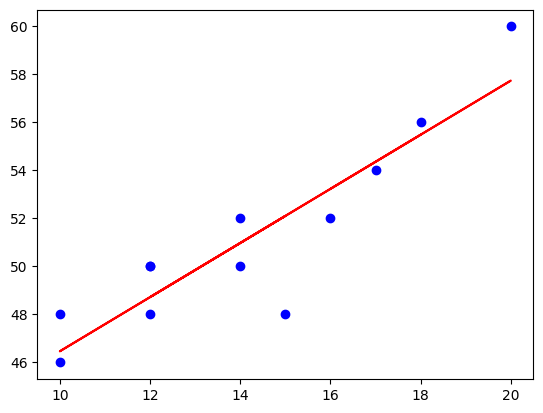

In [47]:
# scatterplot

# plt.plot(df['income'], df['food_expenses'], '.', color='blue')
plt.scatter(df['income'], df['food_expenses'], color='blue')

#  ຫາຄວາມຊັນ (slop)
m,b = np.polyfit(df['income'], df['food_expenses'],1)
 
# ສ້າງເສັ້ນຕົງ linear regression line
plt.plot(df['income'], m*df['income'] + b, '-', color='red')
#show the plot
plt.show()

#### Step 3. ແບ່ງຂໍ້ມູນສຳລັບການສອນ Train and Test

In [48]:
# if you have not too much data you can count , if too much data use sklearn train_test_split
# x, y for simple regression
x = df[['income']]
y = df[['food_expenses']]

#split the data into training / testing 
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values


# print(x_train)
# print(y_train)
print(x_test)
print(y_test)

[[17]
 [18]]
[[54]
 [56]]


#### Step 4: Teach Model (Training Model)

In [49]:
#create model object linear 
model = LinearRegression()

#train the model with the data
model.fit(x_train, y_train)


LinearRegression()

#### Step 5. prediction data from Regression Model

In [50]:
# example prediction 

print("Predict: ", model.predict(x_test))

Predict:  [[54.3030303 ]
 [55.41818182]]


#### Step 6. Model Evaluation

In [51]:
# look at value coefficient and intercept 
print('Coeffiecient:',model.coef_) # corefficient
print('Intercept:', model.intercept_) # intercept ຄ່າທີ່ຕັດແກນ Y

# ดุค่าความแม่นยำของโมเดล โดยใช้ค่า R-squared
print("R-squared:", model.score(x_test, y_test)) # R-Square ของการทำนาย มีค่าตั้งแต่ 0.1 -1 (x100) ค่าที่ใกล้ 1 คือ การทำนายที่ดี

print("Accurately %.2f%%" %(model.score(x_test, y_test) * 100))

Coeffiecient: [[1.11515152]]
Intercept: [35.34545455]
R-squared: 0.7848301193755732
Accurately 78.48%


#### Step 7. การวาดกราฟแสดงผลลัพธ์ของโมเดล

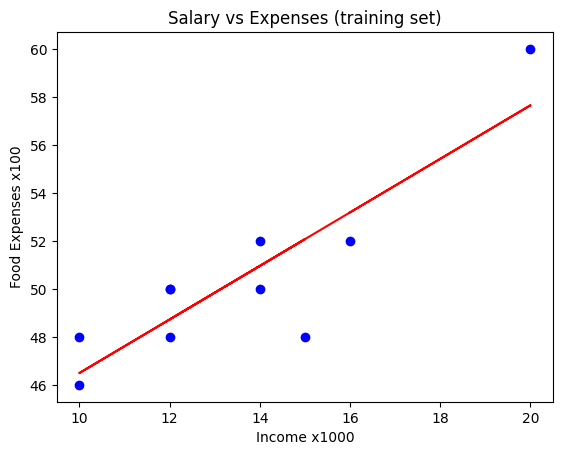

In [52]:
# plotting the training set 
plt.scatter(x_train,y_train, color="blue")

# plotting the regression line 
plt.plot(x_train,model.predict(x_train), color='red')

# adding labels 
plt.title('Salary vs Expenses (training set)')
plt.xlabel('Income x1000')
plt.ylabel('Food Expenses x100')

plt.show()

#### Step 8. Save model and Model export

In [53]:
# Check library joblis if exists or not
!pip show joblib

Name: joblib
Version: 1.3.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: C:\Users\Kenshin\Desktop\Pythong for ML\env\Lib\site-packages
Requires: 
Required-by: scikit-learn


In [54]:
# call joblib
from joblib import dump 

#save model 
dump(model , 'salary_food_model.joblib')

['salary_food_model.joblid']

['salary_food_model.joblid']

#### Step 9. Load model

In [60]:
# call joblib 
from joblib import load 

# load file model 
myModel = load('../MyModelTrained/salary_food_model.joblib')

# test prediction  with salary queal 23000 and 35000 baht
myModel.predict([[23],[35]])


array([[60.99393939],
       [74.37575758]])